# Similar Player finder
: Aims to find a similar player based on standard_stats.csv file scraped from fbref.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import euclidean

In [3]:
# Load csv
df = pd.read_csv('old_squad.csv')


In [8]:
df.columns

Index(['Unnamed: 0', 'player', 'nation', 'pos', 'age', 'mp', 'starts', 'min',
       '90s', 'gls', 'ast', 'g+a', 'g-pk', 'pk', 'pkatt', 'crdy', 'crdr', 'xg',
       'npxg', 'xag', 'npxg+xag', 'prgc', 'prgp', 'prgr', 'gls.1', 'ast.1',
       'g+a.1', 'g-pk.1', 'g+a-pk', 'xg.1', 'xag.1', 'xg+xag', 'npxg.1',
       'npxg+xag.1', 'matches', 'team'],
      dtype='object')

In [9]:
df.head()

,Unnamed: 0,player,nation,pos,age,mp,starts,min,90s,gls,...,g+a.1,g-pk.1,g+a-pk,xg.1,xag.1,xg+xag,npxg.1,npxg+xag.1,matches,team
0,0,William Saliba,fr FRA,DF,23-036,35,35,3150.0,35.0,2.0,...,0.09,0.06,0.09,0.04,0.01,0.05,0.04,0.05,Matches,Arsenal
1,1,Declan Rice,eng ENG,MF,25-106,35,34,2955.0,32.8,6.0,...,0.40,0.18,0.40,0.08,0.14,0.23,0.08,0.23,Matches,Arsenal
2,2,Bukayo Saka,eng ENG,FW,22-237,33,33,2753.0,30.6,15.0,...,0.78,0.33,0.62,0.45,0.31,0.76,0.32,0.63,Matches,Arsenal
3,3,Martin Ødegaard,no NOR,MF,25-134,32,32,2822.0,31.4,8.0,...,0.51,0.19,0.45,0.20,0.27,0.47,0.15,0.42,Matches,Arsenal
4,4,Ben White,eng ENG,DF,26-204,34,32,2740.0,30.4,4.0,...,0.26,0.13,0.26,0.03,0.10,0.14,0.03,0.14,Matches,Arsenal


> Later, probs change every stat to per 90 min? and remove players with too little mp

In [12]:
# Choose relevant features
features = [
    'gls', 'ast', 'g+a','xg', 'xag', 'prgc', 'prgp', 'prgr',  # Example stats
    'npxg.1', 'npxg+xag.1', 'min', '90s', 'g+a-pk'
]

In [13]:
# Normalize the features (scaling them between 0 and 1)
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

In [22]:


def find_most_similar_players(df, player_name, features, top_n=10):
    # Get the stats for the reference player
    player_stats = df[df['player'] == player_name][features].values[0]

    # Compute distances to all other players
    df['distance'] = df.apply(lambda row: euclidean(player_stats, row[features].values), axis=1)

    # Exclude the reference player and sort by distance
    similar_players = df[df['player'] != player_name].sort_values('distance').head(top_n)

    return similar_players

In [32]:
# Example usage
reference_player = "Rodri"
similar_player = find_most_similar_players(df, reference_player, features)

# Print the result
# print(f"Most similar player to {reference_player}:")
# print(similar_player[['Player', 'Team', 'Distance']])

In [33]:
similar_player

,Unnamed: 0,player,nation,pos,age,mp,starts,min,90s,gls,...,g-pk.1,g+a-pk,xg.1,xag.1,xg+xag,npxg.1,npxg+xag.1,matches,team,distance
1,1,Declan Rice,eng ENG,MF,25-106,35,34,0.938076,0.937143,0.285714,...,0.18,0.222222,0.08,0.14,0.23,0.024768,0.041516,Matches,Arsenal,0.330420
214,214,Bruno Guimarães,br BRA,MF,26-165,33,33,0.921562,0.922857,0.238095,...,0.16,0.188889,0.11,0.17,0.28,0.034056,0.050542,Matches,Newcastle United,0.403753
64,64,Alexis Mac Allister,ar ARG,MF,25-127,30,28,0.751032,0.751429,0.190476,...,0.11,0.166667,0.11,0.12,0.23,0.024768,0.036101,Matches,Liverpool,0.539528
403,403,Pascal Groß,de GER,"MF,DF",32-319,32,30,0.874246,0.874286,0.190476,...,0.10,0.233333,0.18,0.24,0.42,0.046440,0.072202,Matches,Brighton and Hove Albion,0.572456
104,104,John McGinn,sct SCO,"MF,FW",29-194,32,32,0.867577,0.868571,0.285714,...,0.20,0.183333,0.16,0.14,0.31,0.049536,0.055957,Matches,Aston Villa,0.588409
3,3,Martin Ødegaard,no NOR,MF,25-134,32,32,0.895840,0.897143,0.380952,...,0.19,0.250000,0.20,0.27,0.47,0.046440,0.075812,Matches,Arsenal,0.589173
103,103,Douglas Luiz,br BRA,MF,25-356,32,32,0.867895,0.868571,0.428571,...,0.16,0.183333,0.22,0.16,0.38,0.037152,0.050542,Matches,Aston Villa,0.592785
144,144,James Maddison,eng ENG,MF,27-158,23,23,0.575738,0.577143,0.190476,...,0.20,0.305556,0.23,0.23,0.47,0.071207,0.084838,Matches,Tottenham Hotspur,0.618543
255,255,Lucas Paquetá,br BRA,"FW,MF",26-246,28,28,0.755160,0.754286,0.190476,...,0.08,0.166667,0.20,0.19,0.39,0.043344,0.059567,Matches,West Ham United,0.621124
280,280,Conor Gallagher,eng ENG,MF,24-083,32,32,0.854239,0.854286,0.190476,...,0.13,0.183333,0.10,0.16,0.26,0.030960,0.046931,Matches,Chelsea,0.628360


### Graph

In [34]:
import matplotlib.pyplot as plt

In [35]:
# Plotting function
def plot_similar_players(reference_player, similar_players):
    # Plot distances
    plt.figure(figsize=(10, 6))
    plt.barh(similar_players['player'], similar_players['distance'], color='skyblue')
    plt.xlabel('Euclidean Distance')
    plt.ylabel('Player')
    plt.title(f'Top {len(similar_players)} Players Similar to {reference_player}')
    plt.gca().invert_yaxis()  # Invert y-axis to show the closest player on top
    plt.show()

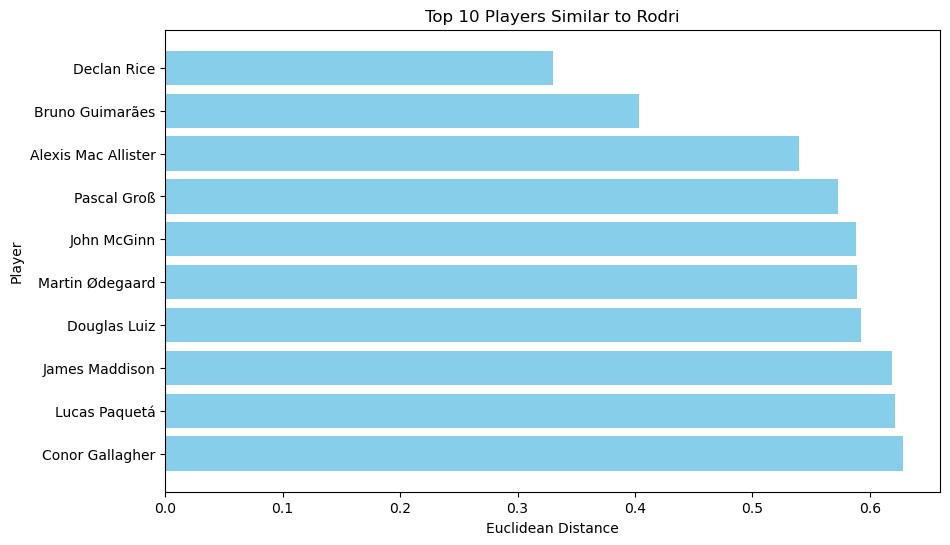

In [36]:
plot_similar_players(reference_player, similar_player)